# 1D steady-state diffusion

Diffusion problems study the *spreading of substances* (e.g., heat, particles, or pollutants) over time due to random motion, governed mathematically by the diffusion equation. At steady state, the solution depends on boundary conditions (e.g., fixed values or fluxes at edges), with applications spanning heat transfer, environmental pollutant dispersion, biological transport, and material science. The problems are analytically solvable in simple geometries but often require numerical methods for complex scenarios.

## Problem setup

The adiabatic rod has a length $L=0.5$ m, corss-sectional area $A=10\times10^{-3}$ m$^2$, left-end temperature $T_A=100$ &deg;C, right-end temperature $T_B=500$ &deg;C, and thermal conductivity $k=1000$ W/(m$\cdot$K). Determine the steady-state temperature distribution.

![Adiabatic rod](images/diffusion1d.jpg)

The mathematical model for one-dimensional steady-state diffusion problem is

$$\frac{\mathrm{d}}{\mathrm{d}x} \left( k\frac{\mathrm{d}T}{\mathrm{d}x} \right) = 0.$$

The boundary conditions are

$$T|_{x=0} = T_A, \quad T|_{x=L} = T_B.$$

The analytical solution for the temperature distribution at steady state is

$$T = T_A - \frac{T_A - T_B}{L}x.$$

## Solve problem

### Define 1D grid

Divide the rod evenly into 5 control volumes, as a result, $\delta x=0.1$ m.

<!-- <div style="text-align:center">
  <img src="https://gitlab.com/mscm/computational-fluids/-/raw/main/images/diffusion1d_grid.jpg?ref_type=heads" alt="Grid" width="500" />
</div> -->

![Grid](images/diffusion1d_grid.jpg)

### Discretize 1D diffusion equation

Make $k = k_w$ and $A = A_w = A_e$, derive the discrete equations for the internal and boundary nodes as following.

**Internal Nodes 2, 3 and 4**

The discrete equation satisfied by the internal nodes in the rod is

$$a_P T_P = a_W T_W + a_E T_E,$$

where

$$a_W = a_E = \frac{k}{\delta x}A, \quad a_P = a_W + a_E = \frac{2k}{\delta x}A.$$

**Boundary Node 1**

The discrete equation for the boundary node 1 is

$$a_P T_P = a_W T_W + a_E T_E + S_u,$$

where

$$a_W = 0, \quad a_E = \frac{k}{\delta x}A, \quad a_P = a_W + a_E - S_p,$$

$$S_P = -\frac{2k}{\delta x}A, \quad S_u = \frac{2k}{\delta x}A \cdot T_A$$

**Boundary Node 5**

The discrete equation for the boundary node 5 is

$$a_P T_P = a_W T_W + a_E T_E + S_u,$$

where

$$a_W = \frac{k}{\delta x}A, \quad a_E = 0, \quad a_P = a_W + a_E - S_p,$$

$$S_P = -\frac{2k}{\delta x}A, \quad S_u = \frac{2k}{\delta x}A \cdot T_B$$

### Solve algebraic equations

In [6]:
# Step 0: import required libraries
import numpy as np                      # for array operation
from matplotlib import pyplot as plt    # for plotting figures

In [7]:
# Step 1: parameter declarations
nx = 5                                  # number of spatial grid points
k = 1000                                # thermal conductivity
L = 0.5                                 # length of the rod
A = 0.01                                # cross-sectional area of the rod
TA = 100                                # temperature at x = 0
TB = 500                                # temperature at x = L
nt = 30                                 # number of iterations
dx = L / nx                             # spatial grid size
coeff = k*A/dx                          # coefficient for west terms
x = np.linspace(0.5*dx, L-0.5*dx, nx)   # spatial grid points

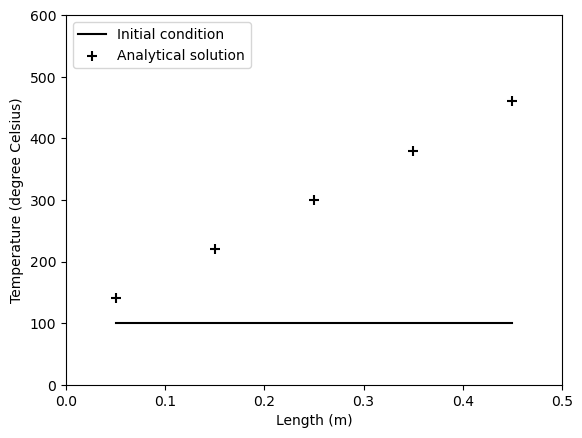

In [8]:
# Step 2.1: set initial condition
T = np.ones(nx) * TA                    # a numpy array with nx elements all equal to TA

# Step 2.2: visualize initial condition and analytical solution
plt.figure()                            # create a new figure
plt.plot(x, T, '-k', label='Initial condition')
plt.scatter(x, TA-(TA-TB)/L*x, s=50, c='k', marker='+', label='Analytical solution')
plt.xlabel('Length (m)')
plt.ylabel('Temperature (degree Celsius)')
ax = plt.gca()
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 600)
plt.legend(loc='upper left')
plt.show()                              # show the figure

In [9]:
# Step 3: finite volume calculations
Tn = np.ones(nx)                        # placeholder array to advance the solution
for n in range(nt):
    Tn = T.copy()                       # copy the existing (old) values of T into Tn
    
    # left boundary
    T[0] = (coeff*Tn[1] + 2 * coeff*TA) / (coeff + 2*coeff)

    # internal nodes
    for i in range(1, nx-1):            # skip the first and the last elements
        T[i] = (coeff*Tn[i-1] + coeff*Tn[i+1]) / (2*coeff)

    # right boundary
    T[-1] = (coeff*Tn[-2] + 2*coeff*TB) / (coeff + 2*coeff)
    
    # calculate the temperature difference for convergence
    Tdiff = np.sum(np.abs(T - Tn))      # total temperature difference
    if (n+1) % 10 == 0:                 # print every 100 iterations
        print('Iteration {}: Tdiff = {:.3f}'.format(n+1, Tdiff))

Iteration 10: Tdiff = 26.337
Iteration 20: Tdiff = 3.468
Iteration 30: Tdiff = 0.457


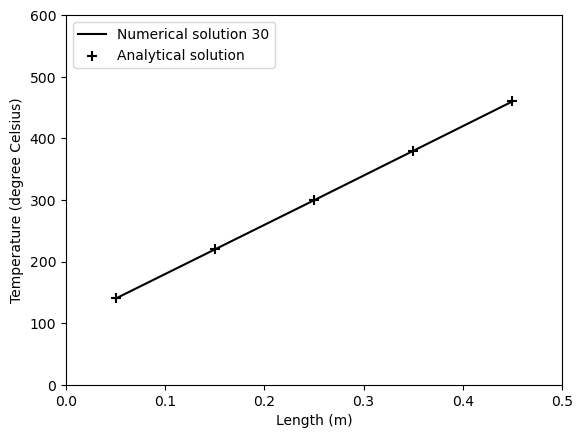

In [ ]:
# Step 4: visualize results after advancing in time
fig = plt.figure()
plt.plot(x, T, '-k', label='Numerical solution {}'.format(n+1))
plt.scatter(x, TA-(TA-TB)/L*x, s=50, c='k', marker='+', label='Analytical solution')
plt.xlabel('Length (m)')
plt.ylabel('Temperature (degree Celsius)')
ax = plt.gca()
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 600)
plt.legend(loc='upper left')
plt.show()

```{note}
The variable $n$ here represents a *pseudo-time* that advances the simulation to converge towards the analytical solution.
```

## Exercise

1. Try to do more iterations and observe the final temperature difference.

2. Modify the code so that a small tolerance for the error (e.g., 10$^{-5}$) can be specified to obtain a convergent result.